## Iris, 보스턴 집값 데이터셋 Decision Tree 알고리즘 적용하기

#### 라이브러리 및 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.datasets import fetch_openml

C:\Users\user\AppData\Local\Temp\ipykernel_21556\2307668186.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 분류 나무(Decision Tree Classifier)

#### iris 데이터 불러오기

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 모델 학습

In [3]:
X = df.drop('species', axis=1)
y = df['species'] 

clf = DecisionTreeClassifier(criterion='entropy', ## 'gini', 'log_loss'            
                             splitter='best', ## 'random'            
                             max_depth=3, ## '최대 깊이'            
                             min_samples_leaf=5, ## 최소 끝마디 샘플 수            
                             random_state=100).fit(X,y)

In [4]:
# 예측 결과
print(clf.predict(X)[:3])

['setosa' 'setosa' 'setosa']


In [5]:
for i, col in enumerate(X.columns):
    print(f'{col} 중요도 : {clf.feature_importances_[i]}')

print(clf.get_params()) ## DecisionTreeClassifier 클래스 인자 설정 정보
print('정확도 : ', clf.score(X,y)) ## 성능 평가 점수(정확도 Accuracy)

sepal length (cm) 중요도 : 0.0
sepal width (cm) 중요도 : 0.0
petal length (cm) 중요도 : 0.6881645055774848
petal width (cm) 중요도 : 0.3118354944225151
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 100, 'splitter': 'best'}
정확도 :  0.9733333333333334


#### 모형 시각화

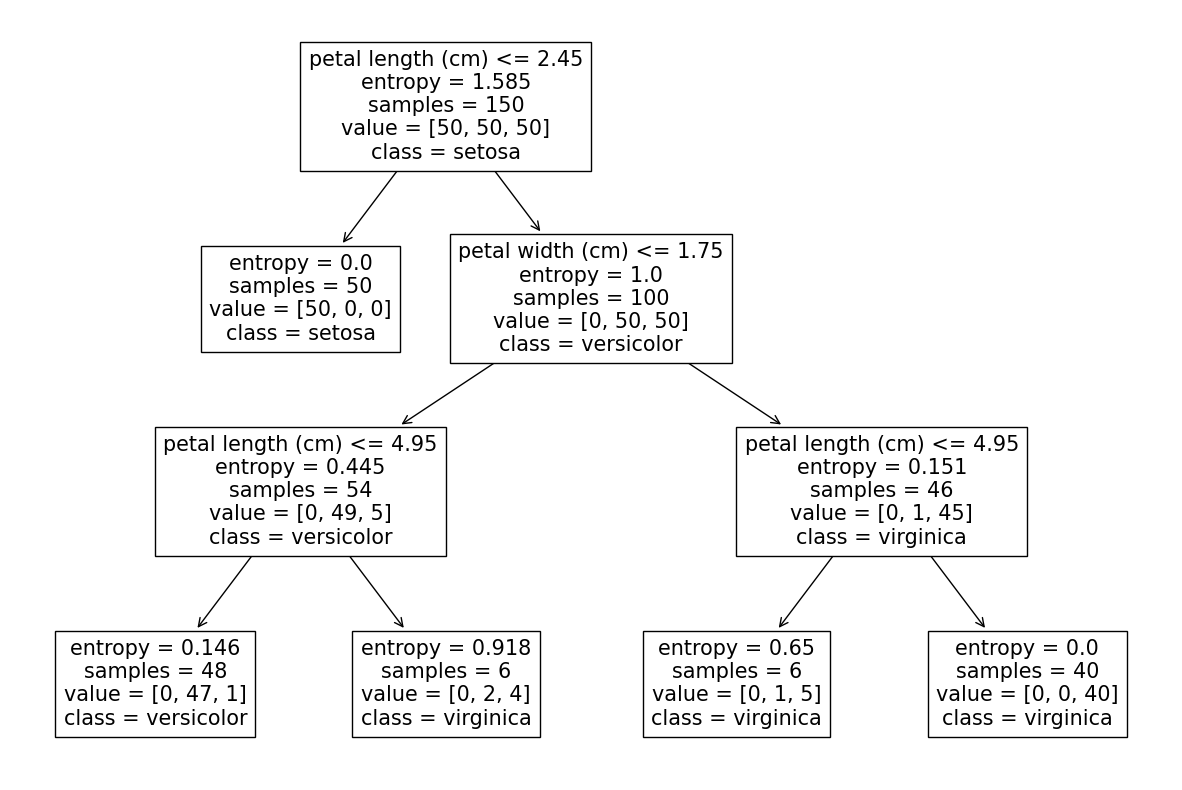

In [6]:
fig = plt.figure(figsize=(15, 10), facecolor='white')
plot_tree(clf,          
          feature_names=X.columns, ## 박스에 변수 이름 표시          
          class_names=clf.classes_, ## 클래스 이름(범주 이름)         
          )

plt.show()


### 회귀 나무(Decision Tree Regressor)

#### 보스턴 집값 데이터 불러오기

In [7]:
boston = fetch_openml(name='boston')

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.head()

c:\Users\user\anaconda3\envs\ml\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### 모델 학습

In [8]:
X = df.drop('MEDV', axis=1)
y = df['MEDV'] 

reg = DecisionTreeRegressor(
    criterion = 'squared_error', ## “squared_error”, “friedman_mse”, “absolute_error”, “poisson”            
    splitter='best', ## 'random'            
    max_depth=3, ## '최대 깊이'            
    min_samples_leaf=10, ## 최소 끝마디 샘플 수            
    random_state=100        
    ).fit(X,y)

In [9]:
## 예측
print(reg.predict(X)[:3])  ## 변수 중요도
for i, col in enumerate(X.columns):    
    print(f'{col} 중요도 : {reg.feature_importances_[i]}') 
    
print(reg.get_params()) ## DecisionTreeRegressor 클래스 인자 설정 정보
print('정확도 : ', reg.score(X,y)) ## 성능 평가 점수(R-square)

[22.6506383  22.6506383  35.24782609]
CRIM 중요도 : 0.03439671315633016
ZN 중요도 : 0.0
INDUS 중요도 : 0.0
CHAS 중요도 : 0.0
NOX 중요도 : 0.0
RM 중요도 : 0.6777780289645137
AGE 중요도 : 0.0
DIS 중요도 : 0.0
RAD 중요도 : 0.0
TAX 중요도 : 0.0
PTRATIO 중요도 : 0.008594584926950963
B 중요도 : 0.0
LSTAT 중요도 : 0.2792306729522052
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 100, 'splitter': 'best'}
정확도 :  0.7737076435842268


#### 모형 시각화

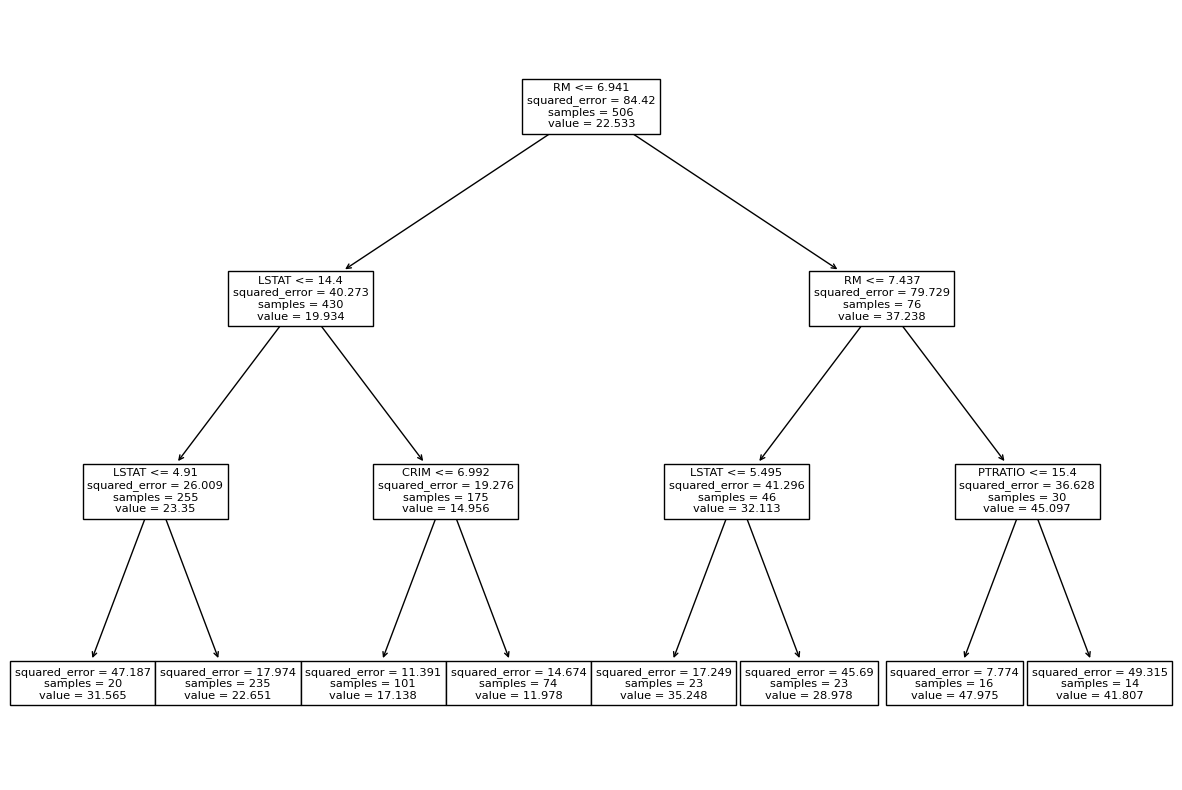

In [10]:
fig = plt.figure(figsize=(15, 10), facecolor='white')
plot_tree(reg,          
          feature_names=X.columns, ## 박스에 변수 이름 표시         
          )

plt.show()